# Task 1: Data Understanding \& Preparation

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings 

warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
df = pd.read_csv('../dataset/customer_supermarket.csv', sep='\t', index_col=0)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
541905,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
541906,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
541907,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
541908,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


## Basic checks

In [4]:
df.drop_duplicates(ignore_index=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,01/12/10 08:26,"2,55",17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,01/12/10 08:26,"2,75",17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,01/12/10 08:26,"3,39",17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466673,581587,09/12/11 12:50,"2,1",12680.0,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466674,581587,09/12/11 12:50,"4,15",12680.0,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466675,581587,09/12/11 12:50,"4,15",12680.0,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466676,581587,09/12/11 12:50,"4,95",12680.0,France,22138,BAKING SET 9 PIECE RETROSPOT,3


In [5]:
df.dtypes

BasketID            object
BasketDate          object
Sale                object
CustomerID         float64
CustomerCountry     object
ProdID              object
ProdDescr           object
Qta                  int64
dtype: object

In [6]:
df['Sale'] = df['Sale'].str.replace(',', '.')
df['Sale'] = pd.to_numeric(df['Sale'])
df = df.astype({'BasketDate': 'datetime64',
                'CustomerID': 'object'})

In [7]:
df.dtypes

BasketID                   object
BasketDate         datetime64[ns]
Sale                      float64
CustomerID                 object
CustomerCountry            object
ProdID                     object
ProdDescr                  object
Qta                         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466678 entries, 0 to 466677
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         466678 non-null  object        
 1   BasketDate       466678 non-null  datetime64[ns]
 2   Sale             466678 non-null  float64       
 3   CustomerID       401605 non-null  object        
 4   CustomerCountry  466678 non-null  object        
 5   ProdID           466678 non-null  object        
 6   ProdDescr        465925 non-null  object        
 7   Qta              466678 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 28.5+ MB


In [9]:
df.isnull().any()

BasketID           False
BasketDate         False
Sale               False
CustomerID          True
CustomerCountry    False
ProdID             False
ProdDescr           True
Qta                False
dtype: bool

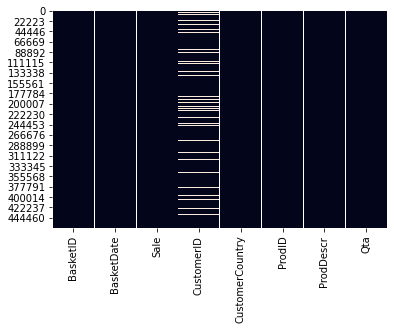

In [15]:
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.describe()

,Sale,Qta
count,466678.000000,466678.000000
mean,4.049057,10.806528
std,84.237135,232.627771
min,-11062.060000,-80995.000000
25%,1.250000,2.000000
50%,2.080000,4.000000
75%,3.750000,12.000000
max,38970.000000,80995.000000


## Data Cleaning and Integration

### Products Descriptions

First of all, it seems that there are some null descriptions:

In [58]:
prods = df.groupby('ProdID')['ProdDescr'].describe().reset_index()
prods

,ProdID,count,unique,top,freq
0,10002,24,1,INFLATABLE POLITICAL GLOBE,24
1,10080,21,1,GROOVY CACTUS INFLATABLE,21
2,10120,24,1,DOGGY RUBBER,24
3,10123C,2,1,HEARTS WRAPPING TAPE,2
4,10124A,4,1,SPOTS ON RED BOOKCOVER TAPE,4
...,...,...,...,...,...
3566,90214Z,1,1,LETTER Z BLING KEY RING,1
3567,C2,29,1,CARRIAGE,29
3568,DOT,16,1,DOTCOM POSTAGE,16
3569,PADS,4,1,PADS TO MATCH ALL CUSHIONS,4


In order to clean in this sense, we need to remove rows for which the *ProdID* appear just one time with null description:

In [57]:
null_prods = prods[(prods['count'] == 0) & (prods['top'].isnull())]
null_prods

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [13]:
df = df[~df.ProdID.isin(null_prods.ProdID)]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,6
...,...,...,...,...,...,...,...,...
466609,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDREN'S APRON DOLLY GIRL,6
466610,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
466611,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
466612,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET 9 PIECE RETROSPOT,3


Then, in order to integrate the remaining null descriptions, we copy the description of the product with the same *ProdID* for those in which it missing:

In [14]:
df['ProdDescr'] = df['ProdDescr'].replace('check', np.nan, regex=True)

In [15]:
df['ProdDescr'] = np.where(df['ProdDescr'].isnull(), df['ProdID'].map(prods.set_index('ProdID')['top']), df['ProdDescr'])

In [16]:
df['ProdDescr'].isnull().any()

False

Now we need to remove the rows corresponding to lower or mixed case descriptions which will be not effective for the feature extraction step since they don't represent a product description:

In [17]:
df.groupby('ProdDescr').describe()

Sale                                        \
                                count      mean       std   min   25%   50%   
ProdDescr                                                                     
 4 PURPLE FLOCK DINNER CANDLES   38.0  2.381842  0.739276  0.79  2.55  2.55   
 50'S CHRISTMAS GIFT BAG LARGE  116.0  1.300345  0.247958  1.04  1.25  1.25   
 DOLLY GIRL BEAKER              156.0  1.384167  0.390947  1.08  1.25  1.25   
 I LOVE LONDON MINI BACKPACK     75.0  4.194533  0.483664  3.75  4.15  4.15   
 I LOVE LONDON MINI RUCKSACK      1.0  4.150000       NaN  4.15  4.15  4.15   
...                               ...       ...       ...   ...   ...   ...   
wrong code?                       1.0  0.000000       NaN  0.00  0.00  0.00   
wrongly coded 20713               2.0  0.000000  0.000000  0.00  0.00  0.00   
wrongly coded-23343               1.0  0.000000       NaN  0.00  0.00  0.00   
wrongly sold as sets              1.0  0.000000       NaN  0.00  0.00  0.00   
wrongly sold sets                 1.0  0.000000       NaN  0.00  0.00  0.00   

                                              Qta                           \
                                 75%   max  count        mean          std   
ProdDescr                                                                    
 4 PURPLE FLOCK DINNER CANDLES  2.55  4.96   38.0    3.684211     3.932575   
 50'S CHRISTMAS GIFT BAG LARGE  1.25  2.46  116.0   16.327586    36.799758   
 DOLLY GIRL BEAKER              1.25  2.46  156.0   15.467949    51.789452   
 I LOVE LONDON MINI BACKPACK    4.15  8.29   75.0    4.946667     8.857572   
 I LOVE LONDON MINI RUCKSACK    4.15  4.15    1.0    1.000000          NaN   
...                              ...   ...    ...         ...          ...   
wrong code?                     0.00  0.00    1.0 -100.000000          NaN   
wrongly coded 20713             0.00  0.00    2.0 -100.000000  1272.792206   
wrongly coded-23343             0.00  0.00    1.0 -800.000000          NaN   
wrongly sold as sets            0.00  0.00    1.0 -600.000000          NaN   
wrongly sold sets               0.00  0.00    1.0 -975.000000          NaN   

                                                                    
                                   min    25%    50%    75%    max  
ProdDescr                                                           
 4 PURPLE FLOCK DINNER CANDLES     1.0    1.0    2.0    4.0   12.0  
 50'S CHRISTMAS GIFT BAG LARGE    -2.0   12.0   12.0   12.0  400.0  
 DOLLY GIRL BEAKER                -6.0    1.0    4.0   12.0  400.0  
 I LOVE LONDON MINI BACKPACK       1.0    2.0    4.0    4.0   50.0  
 I LOVE LONDON MINI RUCKSACK       1.0    1.0    1.0    1.0    1.0  
...                                ...    ...    ...    ...    ...  
wrong code?                     -100.0 -100.0 -100.0 -100.0 -100.0  
wrongly coded 20713            -1000.0 -550.0 -100.0  350.0  800.0  
wrongly coded-23343             -800.0 -800.0 -800.0 -800.0 -800.0  
wrongly sold as sets            -600.0 -600.0 -600.0 -600.0 -600.0  
wrongly sold sets               -975.0 -975.0 -975.0 -975.0 -975.0  

[4094 rows x 16 columns]

In [18]:
df[(df['ProdDescr'].str.islower()) | # lower case
   (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case

array(['Discount', 'BAG 500g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm',
       'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No',
       'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES',
       '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges',
       'NUMBER TILE COTTAGE GARDEN No', 'amazon',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', "Dad's Cab Electronic Meter",
       'NUMBER TILE VINTAGE FONT No ', 'Dotcom sales',
       'POLYESTER FILLER PAD 30CMx30CM',
       'Dotcomgiftshop Gift Voucher £40.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'mouldy, thrown away.',
       'found', 'Found', "Dr. Jam's Arouzer Stress Ball", '?',
       'label mix up', 'samples/damages', 'thrown away', 'damages',
       'showroom', 'wrongly sold as sets', 'dotcom sol

In [19]:
df['ProdDescr'] = df['ProdDescr'].str.replace('[^\w\s]', '') # removing punctuation
df['ProdDescr'] = df['ProdDescr'].str.replace('\w*\d\w*', '') # removing words with numbers

df['ProdDescr'] = df['ProdDescr'].str.strip() # removing spaces at the beginning and at the end

# adjusting errors
df['ProdDescr'] = df['ProdDescr'].str.replace('No', '') # removing 'No'
df['ProdDescr'].replace({'TRADITIONAl BISCUIT CUTTERS  SET': 'TRADITIONAl BISCUIT CUTTERS  SET'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dads Cab Electronic Meter': 'Dads Cab Electronic Meter'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dr Jams Arouzer Stress Ball': 'Dr Jams Arouzer Stress Ball'.upper()}, inplace=True)
df['ProdDescr'].replace({'Dotcomgiftshop Gift Voucher': 'Dotcomgiftshop Gift Voucher'.upper()}, inplace=True)
df['ProdDescr'].replace({'FLOWERS HANDBAG blue and orange': 'FLOWERS HANDBAG blue and orange'.upper()}, inplace=True)

del_descr = df[(df['ProdDescr'].str.islower()) | # lower case
               (~df['ProdDescr'].str.islower() & ~df['ProdDescr'].str.isupper())]['ProdDescr'].unique() # mixed case
del_descr

array(['Discount', 'Manual', 'Bank Charges', 'amazon', 'Dotcom sales',
       'reverse  adjustment', 'mouldy thrown away', 'found', 'Found', '',
       'label mix up', 'samplesdamages', 'thrown away', 'damages',
       'showroom', 'wrongly sold as sets', 'dotcom sold sets',
       'Amazon sold sets', 'wrongly sold sets', 'sold as sets',
       'damagesdisplay', 'damaged stock', 're dotcom quick fix',
       'sold in set', 'damaged', 'Damaged', 'Missing', 'adjustment',
       'returned', 'wrong code', 'crushed', 'damagescredits from ASOS',
       'mailout', 't rcvd in  delivery', 'Thrown awayrusty',
       'damagesdotcom', 'smashed', 'reverse previous adjustment',
       'incorrectly credited  see', 'Next Day Carriage', 'wet damaged',
       'Water damaged', 'missing', 'sold as set on dotcom',
       'to push order througha s stock was', 'mix up with c',
       'came coded as', 'alan hodge cant mamage this section', 'dotcom',
       'ebay', 'Sold as  on dotcom', 'Adjust bad debt',
     

In [20]:
df = df[~(df['ProdDescr'].isin(del_descr))]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
465692,581587,2011-09-12 12:50:00,2.10,12680,France,22899,CHILDRENS APRON DOLLY GIRL,6
465693,581587,2011-09-12 12:50:00,4.15,12680,France,23254,CHILDRENS CUTLERY DOLLY GIRL,4
465694,581587,2011-09-12 12:50:00,4.15,12680,France,23255,CHILDRENS CUTLERY CIRCUS PARADE,4
465695,581587,2011-09-12 12:50:00,4.95,12680,France,22138,BAKING SET PIECE RETROSPOT,3


In [21]:
df = df[~(df['ProdDescr'].str.contains('LOST', regex=True))]

In [22]:
df.groupby('ProdDescr').describe()

Sale                                        \
                                  count       mean           std   min    25%   
ProdDescr                                                                       
A PRETTY THANK YOU CARD            29.0   0.446207  1.068849e-01  0.36   0.42   
ABC TREASURE BOOK BOX             217.0   2.467512  7.012933e-01  1.95   2.25   
ABSTRACT CIRCLE JOURNAL            51.0   2.508431  7.052298e-02  2.10   2.46   
ABSTRACT CIRCLES POCKET BOOK       43.0   0.850000  1.123362e-16  0.85   0.85   
ABSTRACT CIRCLES SKETCHBOOK        68.0   4.295588  1.323720e+00  3.75   3.75   
...                                 ...        ...           ...   ...    ...   
ZINC TLIGHT HOLDER STARS SMALL    262.0   0.900458  2.386805e-01  0.72   0.83   
ZINC TOP   DOOR WOODEN SHELF       14.0  15.552857  7.933728e+00  0.00  16.95   
ZINC WILLIE WINKIE  CANDLE STICK  234.0   1.000812  3.246903e-01  0.00   0.85   
ZINC WIRE KITCHEN ORGANISER        13.0   7.423077  3.346741e+00  3.95   3.95   
ZINC WIRE SWEETHEART LETTER TRAY   22.0   3.818182  1.386141e+00  1.25   3.75   

                                                         Qta             \
                                    50%    75%    max  count       mean   
ProdDescr                                                                 
A PRETTY THANK YOU CARD            0.42   0.42   0.83   29.0  15.310345   
ABC TREASURE BOOK BOX              2.25   2.25   4.95  217.0   9.645161   
ABSTRACT CIRCLE JOURNAL            2.55   2.55   2.55   51.0   3.019608   
ABSTRACT CIRCLES POCKET BOOK       0.85   0.85   0.85   43.0   3.674419   
ABSTRACT CIRCLES SKETCHBOOK        3.75   3.75   7.46   68.0   1.955882   
...                                 ...    ...    ...    ...        ...   
ZINC TLIGHT HOLDER STARS SMALL     0.83   0.83   1.63  262.0  18.896947   
ZINC TOP   DOOR WOODEN SHELF      16.95  16.95  33.29   14.0   0.285714   
ZINC WILLIE WINKIE  CANDLE STICK   0.85   0.85   1.95  234.0  11.888889   
ZINC WIRE KITCHEN ORGANISER       10.40  10.40  10.40   13.0   2.076923   
ZINC WIRE SWEETHEART LETTER TRAY   3.75   3.75   7.46   22.0   3.727273   

                                                                            
                                        std   min   25%   50%   75%    max  
ProdDescr                                                                   
A PRETTY THANK YOU CARD           13.459207   1.0  12.0  12.0  12.0   72.0  
ABC TREASURE BOOK BOX             31.992163  -8.0   1.0   6.0   8.0  300.0  
ABSTRACT CIRCLE JOURNAL            5.049714   1.0   1.0   1.0   3.0   36.0  
ABSTRACT CIRCLES POCKET BOOK       2.560886   1.0   2.0   3.0   4.5   12.0  
ABSTRACT CIRCLES SKETCHBOOK        1.480559   1.0   1.0   1.0   3.0    9.0  
...                                     ...   ...   ...   ...   ...    ...  
ZINC TLIGHT HOLDER STARS SMALL    29.683788 -24.0  12.0  12.0  12.0  216.0  
ZINC TOP   DOOR WOODEN SHELF       2.198901  -5.0   1.0   1.0   1.0    3.0  
ZINC WILLIE WINKIE  CANDLE STICK  17.252370 -12.0   3.0  12.0  12.0  192.0  
ZINC WIRE KITCHEN ORGANISER        1.255756   1.0   1.0   2.0   3.0    4.0  
ZINC WIRE SWEETHEART LETTER TRAY   5.025476   1.0   1.0   2.0   4.0   24.0  

[3923 rows x 16 columns]

### Sales

Since there is no currency associated with the sale price, it is assumed to be the same for all records, furthermore, it is assumed that the sale price refers to a single item:

In [23]:
min(df['Sale'])

0.0

In [24]:
df[df['Sale'] == 0]

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1692,536546,2010-01-12 14:33:00,0.0,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1724,536553,2010-01-12 14:35:00,0.0,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
3673,536764,2010-02-12 14:42:00,0.0,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,-38
3674,536765,2010-02-12 14:43:00,0.0,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,19
5919,536996,2010-03-12 15:30:00,0.0,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
...,...,...,...,...,...,...,...,...
460936,581209,2011-07-12 18:35:00,0.0,NaN,United Kingdom,21620,SET OF ROSE BOTANICAL CANDLES,6
460937,581211,2011-07-12 18:36:00,0.0,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
461818,581234,2011-08-12 10:33:00,0.0,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27
463189,581406,2011-08-12 13:58:00,0.0,NaN,United Kingdom,46000M,POLYESTER FILLER PAD,240


In [26]:
df['Sale'].replace(0, np.nan, inplace=True)
df[df['Sale'].isnull()]

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
1692,536546,2010-01-12 14:33:00,NaN,NaN,United Kingdom,22145,CHRISTMAS CRAFT HEART STOCKING,1
1724,536553,2010-01-12 14:35:00,NaN,NaN,United Kingdom,37461,FUNKY MONKEY MUG,3
3673,536764,2010-02-12 14:42:00,NaN,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,-38
3674,536765,2010-02-12 14:43:00,NaN,NaN,United Kingdom,84952C,MIRROR LOVE BIRD TLIGHT HOLDER,19
5919,536996,2010-03-12 15:30:00,NaN,NaN,United Kingdom,22712,CARD DOLLY GIRL,-20
...,...,...,...,...,...,...,...,...
460936,581209,2011-07-12 18:35:00,NaN,NaN,United Kingdom,21620,SET OF ROSE BOTANICAL CANDLES,6
460937,581211,2011-07-12 18:36:00,NaN,NaN,United Kingdom,22142,CHRISTMAS CRAFT WHITE FAIRY,14
461818,581234,2011-08-12 10:33:00,NaN,NaN,United Kingdom,72817,SET OF CHRISTMAS DECOUPAGE CANDLE,27
463189,581406,2011-08-12 13:58:00,NaN,NaN,United Kingdom,46000M,POLYESTER FILLER PAD,240


In [27]:
df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))

<ipython-input-27-5cfea2f14368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale'] = df.groupby('ProdID')['Sale'].transform(lambda x: x.replace(to_replace=np.nan, value=x.mean()))


In [28]:
df['Sale'].isnull().any()

False

### Customer Countries

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data:

In [29]:
df['CustomerCountry'].value_counts()

United Kingdom          420213
Germany                   9463
France                    8499
EIRE                      7806
Spain                     2525
Netherlands               2369
Belgium                   2069
Switzerland               1931
Portugal                  1472
Australia                 1258
Norway                    1080
Italy                      801
Channel Islands            755
Finland                    694
Cyprus                     609
Sweden                     460
Austria                    401
Denmark                    389
Japan                      355
Poland                     341
Unspecified                337
USA                        291
Israel                     266
Singapore                  215
Iceland                    182
Canada                     151
Greece                     146
Hong Kong                  134
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         57
Lebanon 

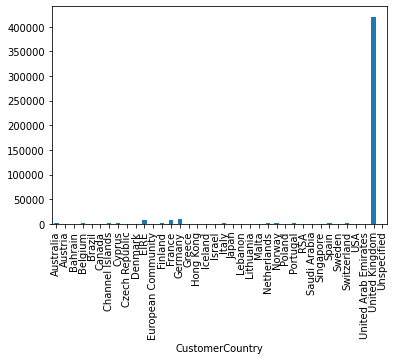

In [30]:
df['CustomerCountry'].groupby(df['CustomerCountry']).count().plot(kind='bar')

As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [31]:
df = df[df['CustomerCountry'] == 'United Kingdom']
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,CustomerCountry,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,United Kingdom,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...,...
420208,581585,2011-09-12 12:31:00,1.95,15804,United Kingdom,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
420209,581586,2011-09-12 12:49:00,2.95,13113,United Kingdom,22061,LARGE CAKE STAND HANGING STRAWBERY,8
420210,581586,2011-09-12 12:49:00,1.25,13113,United Kingdom,23275,SET OF HANGING OWLS OLLIE BEAK,24
420211,581586,2011-09-12 12:49:00,8.95,13113,United Kingdom,21217,RED RETROSPOT ROUND CAKE TINS,24


In [32]:
df.drop('CustomerCountry', axis=1, inplace=True)

### Customers

We remove the records for which the *BasketID* is null:

In [33]:
df[df['CustomerID'].isnull()]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
1260,536544,2010-01-12 14:32:00,2.51,NaN,21774,DECORATIVE CATS BATHROOM BOTTLE,2
1261,536544,2010-01-12 14:32:00,1.66,NaN,21787,RAIN PONCHO RETROSPOT,2
1262,536544,2010-01-12 14:32:00,1.66,NaN,21790,VINTAGE SNAP CARDS,9
1263,536544,2010-01-12 14:32:00,2.51,NaN,21791,VINTAGE HEADS AND TAILS CARD GAME,2
1264,536544,2010-01-12 14:32:00,0.43,NaN,21802,CHRISTMAS TREE HEART DECORATION,9
...,...,...,...,...,...,...,...
419927,581498,2011-09-12 10:26:00,4.13,NaN,85038,CHOCOLATE LOVE HEART TLIGHTS,1
419928,581498,2011-09-12 10:26:00,3.29,NaN,85049a,TRADITIONAL CHRISTMAS RIBBONS,5
419929,581498,2011-09-12 10:26:00,4.96,NaN,85150,LADIES GENTLEMEN METAL SIGN,1
419930,581498,2011-09-12 10:26:00,10.79,NaN,85174,CACTI CANDLES,1


In [34]:
df = df[~df['CustomerID'].isnull()]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,536365,2010-01-12 08:26:00,2.55,17850,85123A,WHITE HANGING HEART TLIGHT HOLDER,6
1,536365,2010-01-12 08:26:00,3.39,17850,71053,WHITE METAL LANTERN,6
2,536365,2010-01-12 08:26:00,2.75,17850,84406B,CREAM CUPID HEARTS COAT HANGER,8
3,536365,2010-01-12 08:26:00,3.39,17850,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6
4,536365,2010-01-12 08:26:00,3.39,17850,84029E,RED WOOLLY HOTTIE WHITE HEART,6
...,...,...,...,...,...,...,...
356159,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
356160,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
356161,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24
356162,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24


In [35]:
df['CustomerID'].isnull().any()

False

### Basket Dates

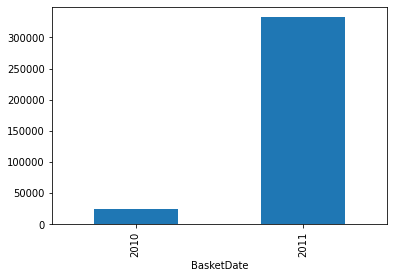

In [36]:
df['BasketDate'].groupby(df['BasketDate'].dt.year).count().plot(kind='bar')

In [37]:
df[df['BasketDate'].dt.year == 2010].groupby([df['BasketDate'].dt.date]).describe()

Sale                                                        \
             count      mean        std   min   25%   50%    75%     max   
BasketDate                                                                 
2010-01-12  1762.0  3.173882   4.891161  0.10  1.25  2.10  3.750  165.00   
2010-02-12  1987.0  3.246789   7.524455  0.03  1.25  2.10  3.750  295.00   
2010-03-12   919.0  3.179728   3.132502  0.12  1.25  2.10  3.750   29.95   
2010-05-12  2379.0  2.863485   2.842838  0.12  1.25  2.10  3.750   49.95   
2010-06-12  1863.0  2.950134   2.718020  0.12  1.25  2.10  3.750   29.95   
2010-07-12  1007.0  3.328729   3.418096  0.07  1.45  2.25  3.915   52.77   
2010-08-12  1823.0  3.184646   5.820152  0.12  1.25  2.10  3.750  165.00   
2010-09-12  1554.0  3.099994   3.103198  0.12  1.25  2.10  3.750   50.00   
2010-10-12  1290.0  3.039481   5.419487  0.10  1.25  2.10  3.750  175.00   
2010-12-12  1344.0  2.727857   2.269397  0.12  1.25  2.10  3.750   19.95   
2010-12-13  1250.0  3.111112   5.706166  0.16  1.25  1.95  3.750  125.00   
2010-12-14  1576.0  2.931218   2.916281  0.12  1.25  1.95  3.750   29.95   
2010-12-15  1237.0  3.622757   8.239467  0.10  1.25  2.10  4.250  125.00   
2010-12-16  1643.0  3.363258   9.019218  0.18  1.25  1.95  3.750  295.00   
2010-12-17   459.0  4.355272  15.001152  0.21  1.25  2.95  4.950  295.00   
2010-12-19   436.0  2.990711   2.681796  0.12  1.25  2.10  3.750   16.95   
2010-12-20   740.0  3.261473   5.387341  0.12  1.25  2.10  3.750  125.00   
2010-12-21   297.0  3.852323   7.722010  0.25  1.25  2.55  4.650  125.00   
2010-12-22   180.0  3.306778   2.598412  0.19  1.25  2.11  4.950   14.95   
2010-12-23   259.0  2.829884   2.372013  0.19  1.25  2.10  3.750   16.95   

               Qta                                                         
             count       mean         std     min  25%  50%   75%     max  
BasketDate                                                                 
2010-01-12  1762.0  11.955165   33.842249   -24.0  1.0  4.0  12.0   600.0  
2010-02-12  1987.0  10.387016  227.699197 -9360.0  2.0  6.0  12.0  2880.0  
2010-03-12   919.0   7.958651   15.839487   -50.0  1.0  2.0  12.0   192.0  
2010-05-12  2379.0   5.607398   20.001254   -24.0  1.0  2.0   5.0   720.0  
2010-06-12  1863.0   8.131508   23.393688   -72.0  1.0  3.0   8.0   480.0  
2010-07-12  1007.0  17.960278   74.611162   -36.0  2.0  5.0  12.0  1008.0  
2010-08-12  1823.0  10.153044   30.772547   -25.0  1.0  4.0  12.0  1000.0  
2010-09-12  1554.0   8.358430   40.419240  -144.0  2.0  4.0   8.0  1394.0  
2010-10-12  1290.0  10.297674   24.925890  -144.0  1.0  3.0  12.0   288.0  
2010-12-12  1344.0   6.016369   47.718800   -12.0  1.0  2.0   5.0  1728.0  
2010-12-13  1250.0  11.927200   24.838830   -48.0  2.0  6.0  12.0   480.0  
2010-12-14  1576.0  10.284264   20.874723   -60.0  2.0  4.0  12.0   384.0  
2010-12-15  1237.0  14.603880   33.372104   -36.0  2.0  6.0  12.0   576.0  
2010-12-16  1643.0  16.936093   68.703215   -80.0  2.0  8.0  12.0  2400.0  
2010-12-17   459.0   7.836601   34.980367  -500.0  2.0  4.0  12.0   300.0  
2010-12-19   436.0   7.288991   15.252932    -1.0  1.0  2.0   6.0   144.0  
2010-12-20   740.0  15.398649   58.949755   -48.0  2.0  4.0  12.0   960.0  
2010-12-21   297.0  11.835017   75.915247   -48.0  1.0  4.0  12.0  1296.0  
2010-12-22   180.0  12.283333   33.888954   -10.0  2.0  5.0  12.0   400.0  
2010-12-23   259.0   8.115830   14.026073   -15.0  1.0  3.0  10.0    96.0

In [38]:
df = df[df['BasketDate'].dt.year == 2011]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
332154,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
332155,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
332156,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24
332157,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24


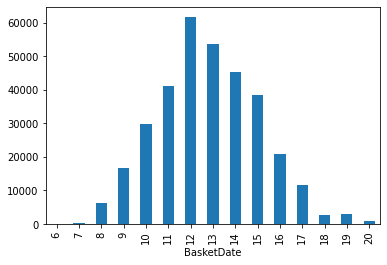

In [39]:
df['BasketDate'].groupby(df['BasketDate'].dt.hour).count().plot(kind='bar')

### Quantities

Also, we notice the presence of some negative quantities which can be considered as a canceled orders or refund:

In [40]:
df[df['Qta'] < 0]

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
68,C540006,2011-04-01 10:48:00,2.10,14606,21306,DAISY MIRROR MAGNETS,-1
69,C540006,2011-04-01 10:48:00,16.95,14606,84352,SILVER CHRISTMAS TREE BAUBLE STAND,-1
70,C540006,2011-04-01 10:48:00,12.75,14606,22423,REGENCY CAKESTAND TIER,-1
71,C540007,2011-04-01 11:08:00,8.95,15379,21055,TOOL BOX SOFT TOY,-6
72,C540007,2011-04-01 11:08:00,2.95,15379,22274,FELTCRAFT DOLL EMILY,-6
...,...,...,...,...,...,...,...
331829,C581490,2011-09-12 09:57:00,1.95,14397,22178,VICTORIAN GLASS HANGING TLIGHT,-12
331830,C581490,2011-09-12 09:57:00,0.83,14397,23144,ZINC TLIGHT HOLDER STARS SMALL,-11
332044,C581568,2011-09-12 11:57:00,10.95,15311,21258,VICTORIAN SEWING BOX LARGE,-5
332045,C581569,2011-09-12 11:58:00,1.25,17315,84978,HANGING HEART JAR TLIGHT HOLDER,-1


In [41]:
df = df[~df['Qta'] < 0]
df.reset_index(drop=True, inplace=True)
df

,BasketID,BasketDate,Sale,CustomerID,ProdID,ProdDescr,Qta
0,539993,2011-04-01 10:00:00,1.95,13313,22386,JUMBO BAG PINK POLKADOT,10
1,539993,2011-04-01 10:00:00,0.42,13313,21499,BLUE POLKADOT WRAP,25
2,539993,2011-04-01 10:00:00,0.42,13313,21498,RED RETROSPOT WRAP,25
3,539993,2011-04-01 10:00:00,2.10,13313,22379,RECYCLING BAG RETROSPOT,5
4,539993,2011-04-01 10:00:00,1.25,13313,20718,RED RETROSPOT SHOPPER BAG,10
...,...,...,...,...,...,...,...
325452,581585,2011-09-12 12:31:00,1.95,15804,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12
325453,581586,2011-09-12 12:49:00,2.95,13113,22061,LARGE CAKE STAND HANGING STRAWBERY,8
325454,581586,2011-09-12 12:49:00,1.25,13113,23275,SET OF HANGING OWLS OLLIE BEAK,24
325455,581586,2011-09-12 12:49:00,8.95,13113,21217,RED RETROSPOT ROUND CAKE TINS,24


## Saving the new dataset

In [42]:
df.to_csv('../dataset/new_customer_supermarket.csv', sep='\t')